In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
import joblib

---
## Phase 1: Data Preparation
This phase is all about getting our data ready for machine learning. We start by loading the main dataset, which contains radiomic features and patient information. The first step in cleaning is to remove irrelevant columns like folder paths, diagnostic versions, and certain shape features that aren't useful for our analysis.

Next, we segregate the data by gender. This is important because we'll be performing separate, stratified splits for male and female patients to ensure the distribution of "Bone Age" (our target variable) is maintained within each group. This helps prevent bias and improves model reliability.

After separating by gender, we define our predictor variables (X) and the target variable (y) ("Bone Age"). Then, using a stratified shuffle split, we divide both the female and male datasets into training, validation, and test sets. This stratification guarantees that the age distribution in each subset closely mirrors the original dataset, which is crucial for robust model evaluation.

Finally, we combine these gender-specific subsets to create unified training, validation, and test sets. To prepare the features for our models, we apply standardization, scaling them to a consistent range. We conclude this phase by visualizing the distribution of the target variable across our new sets, confirming that the data is well-prepared and balanced for the next steps in our machine learning pipeline.

---

In [ ]:
import pandas as pd

merged_df=pd.read_csv('..\data\dicom_radiomics_merged.csv', sep=',')

In [3]:
merged_df["Edad Ósea(días)"]

0      4929
1      2738
2      4017
3      4383
4      3226
       ... 
476    4017
477    1461
478    2677
479    1946
480    5113
Name: Edad Ósea(días), Length: 481, dtype: int64

In [4]:

data_df=merged_df.copy()
data_df.drop(columns=["Folder"], inplace=True)
#data_df.drop(columns=["Folder_x"], inplace=True)
#data_df.drop(columns=["Folder_y"], inplace=True)
#data_df.drop(columns=["diagnostics_Versions_PyRadiomics_2"], inplace=True)

data_df.drop(columns=["diagnostics_Versions_PyRadiomics"], inplace=True)
data_df.drop(columns=["Indicativo"], inplace=True)
data_df.drop(columns=["original_shape_Flatness"], inplace=True)
data_df.drop(columns=["original_shape_LeastAxisLength"], inplace=True)

masculinos = data_df[data_df["Género(0; 1)"] == 0].copy()
femeninos = data_df[data_df["Género(0; 1)"] == 1].copy()

# Copia y limpieza del dataframe
data_df = merged_df.copy()
data_df.drop(columns=["Indicativo", "original_shape_Flatness", 
                        "original_shape_LeastAxisLength", 
                        "diagnostics_Versions_PyRadiomics", 
                        "Folder"], inplace=True)

# Variables predictoras y objetivo
y = data_df["Edad Ósea(días)"].copy().values
X = data_df.drop(columns=["Edad Ósea(días)"]).copy().values


In [5]:


y_f = femeninos["Edad Ósea(días)"].copy().values
X_f = femeninos.drop(columns=["Edad Ósea(días)"]).values

#splot
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_f)
y_binned = pd.qcut(y_series, q=7, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_f, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]
    

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_fg = x_train.copy()
x_test_fg = x_test.copy()
x_validation_fg = x_validation.copy()

y_train_f = y_train.copy()
y_test_f = y_test.copy()
y_validation_f = y_validation.copy()

x_train_f = x_train.copy()
x_test_f = x_test.copy()
x_validation_f = x_validation.copy()


y_m = masculinos["Edad Ósea(días)"].copy().values
X_m = masculinos.drop(columns=["Edad Ósea(días)"]).copy().values

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_m)
y_binned = pd.qcut(y_series, q=10, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_m, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_mg = x_train.copy()
x_test_mg = x_test.copy()
x_validation_mg = x_validation.copy()

y_train_m = y_train.copy()
y_test_m = y_test.copy()
y_validation_m = y_validation.copy()

x_train_m = x_train.copy()
x_test_m = x_test.copy()
x_validation_m = x_validation.copy()


# Combinar los conjuntos de entrenamiento
x_train = np.concatenate([x_train_f, x_train_m], axis=0)
y_train = np.concatenate([y_train_f, y_train_m], axis=0)

# Combinar los conjuntos de validación
x_validation = np.concatenate([x_validation_f, x_validation_m], axis=0)
y_validation = np.concatenate([y_validation_f, y_validation_m], axis=0)

# Combinar los conjuntos de prueba
x_test = np.concatenate([x_test_f, x_test_m], axis=0)
y_test = np.concatenate([y_test_f, y_test_m], axis=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)

joblib.dump(scaler, "scaler.pkl")

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

The dimension of x_train is (157, 100)
The dimension of x_test is (50, 100)
The dimension of x_train is (149, 100)
The dimension of x_test is (47, 100)
The dimension of x_train is (306, 100)
The dimension of x_test is (97, 100)


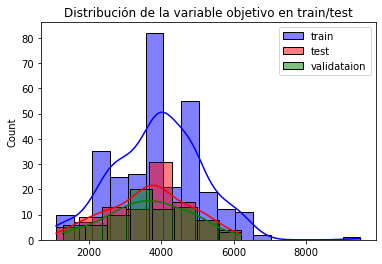

In [6]:
import seaborn as sns
sns.histplot(y_train, color='blue', label='train', kde=True)
sns.histplot(y_test, color='red', label='test', kde=True)
sns.histplot(y_validation, color='green', label='validataion', kde=True)
plt.legend()
plt.title("Distribución de la variable objetivo en train/test")
plt.show()

In [7]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))


Train set size:  306
Validation set size:  78
Test set size:  97
Total:  481


---
## Phase 2: Model Definition and Training

This phase is dedicated to defining, training, and evaluating various machine learning models to predict bone age. The process is systematically applied across three scenarios: first for a general model (using the combined male and female data), then specifically for male data, and finally for female data. This allows for the development of both universal and gender-specific predictive capabilities.

---

In [8]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(x_train, y_train)

#predict
#prediction = lr.predict(x_test)

#actual
actual = y_test

train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.9552963450054441
The test score for lr model is -53565.13248629953

Ridge Model............................................

The train score for ridge model is 0.9001768998957229
The test score for ridge model is 0.8554780032981748


In [9]:
#Lasso regression model

print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.8912971078574259
The test score for ls model is 0.8667610413805715


In [10]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000,100000], random_state=0).fit(x_train, y_train)


#score
print(lasso_cv.score(x_train, y_train))
print(lasso_cv.score(x_test, y_test))

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173989.346018605, tolerance: 37790.31474221312
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12901955.604017708, tolerance: 37790.31474221312
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15813600.034727942, tolerance: 37790.31474221312
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did 

0.8569636129470022
0.8627558231499787


c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16080885.74521438, tolerance: 37088.3311534694
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15962458.52702078, tolerance: 37088.3311534694
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15813717.395282978, tolerance: 37088.3311534694
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not 

In [11]:
import joblib

# Cargar el modelo desde el archivo
joblib.dump(lasso_cv, 'lasso_model.pkl')

['lasso_model.pkl']

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

metrics=[]
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, model, conjunto=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics.append((model,conjunto, mae, mse, rmse, r2))
    print(f"--- Métricas para {conjunto} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()
# Mostrar métricas
y_test_pred=lasso_cv.predict(x_test)
y_train_pred=lasso_cv.predict(x_train)
y_validation_pred=lasso_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test',model='LassoCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation')


--- Métricas para Train ---
MAE:  334.3874
MSE:  213541.2847
RMSE: 462.1053
R²:   0.8570

--- Métricas para Test ---
MAE:  340.0002
MSE:  172877.3693
RMSE: 415.7852
R²:   0.8628

--- Métricas para Validation ---
MAE:  333.8579
MSE:  176661.5331
RMSE: 420.3112
R²:   0.8588



In [13]:
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'R2'])

In [14]:
metrics_df

,Model,Set,MAE,MSE,RMSE,R2
0,LassoCV Train,Train,334.387427,213541.284686,462.105274,0.856964
1,LassoCV Test,Test,340.000204,172877.369266,415.785244,0.862756
2,LassoCV Validation,Validation,333.857851,176661.533067,420.311234,0.858752


In [15]:
# Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv.coef_) 
print ( "Interceptar:" , lasso_cv.intercept_)

Características seleccionadas: [   0.          814.23010226   -0.            0.            0.
    0.            0.            0.            0.            0.
 -240.32623567    0.           -0.            0.           -0.
   -0.            0.            0.           -0.            0.
   -0.           -0.           -0.           -0.            0.
   -0.           -0.           -0.           -0.            0.
   -0.           -0.           -0.           -0.           -0.
    0.           -0.           -0.            0.           -0.
   -0.           -0.           -0.            0.            0.
    0.           -0.            0.           -0.            0.
    0.           -0.            0.           -0.            0.
   -0.           -0.           -0.           -0.           -0.
   -0.           -0.            0.           16.19089695   -0.
    0.           -0.           -0.           -0.           -0.
    0.           -0.           -0.           -0.           -0.
   -0.           -0.    

In [16]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features_g = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_g = selected_features_g.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_g)


Características seleccionadas:
                                  Feature  Coefficient
1                  Edad Cronológica(días)   814.230102
10              original_shape_Sphericity  -240.326236
63  original_glrlm_RunLengthNonUniformity    16.190897


In [17]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))

The train score for ridge model is 0.900176899895726
The test score for ridge model is 0.8554780032980557


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar métricas 
y_test_pred=ridge_cv.predict(x_test)
y_train_pred=ridge_cv.predict(x_train)
y_validation_pred=ridge_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation')


--- Métricas para Train ---
MAE:  285.3986
MSE:  149027.4851
RMSE: 386.0408
R²:   0.9002

--- Métricas para Test ---
MAE:  317.0535
MSE:  182044.7553
RMSE: 426.6670
R²:   0.8555

--- Métricas para Validation ---
MAE:  312.1357
MSE:  168644.8180
RMSE: 410.6639
R²:   0.8652



In [19]:
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'R2'])
metrics_df

,Model,Set,MAE,MSE,RMSE,R2
0,LassoCV Train,Train,334.387427,213541.284686,462.105274,0.856964
1,LassoCV Test,Test,340.000204,172877.369266,415.785244,0.862756
2,LassoCV Validation,Validation,333.857851,176661.533067,420.311234,0.858752
3,RidgeCV Train,Train,285.398635,149027.485081,386.040782,0.900177
4,RidgeCV Test,Test,317.053467,182044.755299,426.667031,0.855478
5,RidgeCV Validation,Validation,312.135750,168644.818042,410.663875,0.865161


In [20]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
'''
# define model
model = XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, seed = 123) 
# define model evaluation method
cv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=3)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
'''

"\n# define model\nmodel = XGBRegressor(objective ='reg:linear', \n                  n_estimators = 100, seed = 123) \n# define model evaluation method\ncv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=3)\n# evaluate model\nscores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)\n# force scores to be positive\nscores = absolute(scores)\nprint('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )\n"

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_g = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.6}


In [24]:
y_test_pred=model_xgb_g.predict(x_test)
y_train_pred=model_xgb_g.predict(x_train)
y_validation_pred=model_xgb_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation')

--- Métricas para Train ---
MAE:  2.7807
MSE:  15.7992
RMSE: 3.9748
R²:   1.0000

--- Métricas para Test ---
MAE:  165.8626
MSE:  109553.6935
RMSE: 330.9890
R²:   0.9130

--- Métricas para Validation ---
MAE:  157.5675
MSE:  80527.4499
RMSE: 283.7736
R²:   0.9356



In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_g = grid_search.best_estimator_
y_pred = mlp_g.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.0, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 335.6367476945071
MSE: 211575.7369276646


In [ ]:
y_test_pred=mlp_g.predict(x_test)
y_train_pred=mlp_g.predict(x_train)
y_validation_pred=mlp_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation')

--- Métricas para Train ---
MAE:  233.4528
MSE:  159307.2997
RMSE: 399.1332
R²:   0.8933

--- Métricas para Test ---
MAE:  335.6367
MSE:  211575.7369
RMSE: 459.9736
R²:   0.8320

--- Métricas para Validation ---
MAE:  309.5396
MSE:  180642.1387
RMSE: 425.0202
R²:   0.8556



In [ ]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_g = grid_search.best_estimator_
y_pred = svr_g.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
341.12896561927226

📊 MAE en test set: 306.04 días


In [ ]:
y_test_pred=svr_g.predict(x_test)
y_train_pred=svr_g.predict(x_train)
y_validation_pred=svr_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation')

--- Métricas para Train ---
MAE:  302.9175
MSE:  209353.6404
RMSE: 457.5518
R²:   0.8598

--- Métricas para Test ---
MAE:  306.0436
MSE:  159405.8098
RMSE: 399.2566
R²:   0.8735

--- Métricas para Validation ---
MAE:  300.6624
MSE:  134624.9945
RMSE: 366.9128
R²:   0.8924



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_g = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_g.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': None, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Best CV R²: 0.8922693015999078
Test R²: 0.4472338684166358
Test MAE: 284.659793814433
Test RMSE: 834.4355954096145


In [ ]:
y_test_pred=decision_tree_g.predict(x_test)
y_train_pred=decision_tree_g.predict(x_train)
y_validation_pred=decision_tree_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation')

--- Métricas para Train ---
MAE:  0.0000
MSE:  0.0000
RMSE: 0.0000
R²:   1.0000

--- Métricas para Test ---
MAE:  284.6598
MSE:  696282.7629
RMSE: 834.4356
R²:   0.4472

--- Métricas para Validation ---
MAE:  275.1667
MSE:  629079.7564
RMSE: 793.1455
R²:   0.4970



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_g = grid_search_rf.best_estimator_
y_pred_rf = random_forest_g.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 10, 'rf__max_features': 0.7, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best CV R²: 0.9090583753611886
Test R²: 0.8563359894750421
Test MAE: 268.91352252082027
Test RMSE: 425.39864495257854


In [ ]:
y_test_pred=random_forest_g.predict(x_test)
y_train_pred=random_forest_g.predict(x_train)
y_validation_pred=random_forest_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation')

--- Métricas para Train ---
MAE:  95.5159
MSE:  28234.8393
RMSE: 168.0323
R²:   0.9811

--- Métricas para Test ---
MAE:  268.9135
MSE:  180964.0071
RMSE: 425.3986
R²:   0.8563

--- Métricas para Validation ---
MAE:  243.7935
MSE:  153606.9217
RMSE: 391.9272
R²:   0.8772



In [29]:
scaler_m = StandardScaler()
x_train = scaler_m.fit_transform(x_train_m)
x_test = scaler_m.transform(x_test_m)
x_validation = scaler_m.transform(x_validation_m)

y_train = y_train_m.copy()
y_test = y_test_m.copy()
y_validation = y_validation_m.copy()

# Escalar características
x_train_g = scaler.transform(x_train_mg)
x_test_g = scaler.transform(x_test_mg)
x_validation_g = scaler.transform(x_validation_mg)

joblib.dump(scaler_m, "scaler_m.pkl")

['scaler_m.pkl']

In [ ]:
joblib.dump(scaler_m, "scaler_m.pkl")

['scaler_m.pkl']

In [ ]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))

Train set size:  149
Validation set size:  38
Test set size:  47
Total:  234


In [ ]:
y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation Masculino')

--- Métricas para Train ---
MAE:  325.2109
MSE:  170317.2223
RMSE: 412.6951
R²:   0.8829

--- Métricas para Test ---
MAE:  346.1238
MSE:  169056.8070
RMSE: 411.1652
R²:   0.8476

--- Métricas para Validation ---
MAE:  322.2661
MSE:  182917.1695
RMSE: 427.6882
R²:   0.8475



In [ ]:
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation Masculino')

--- Métricas para Train ---
MAE:  281.1666
MSE:  131235.1310
RMSE: 362.2639
R²:   0.9098

--- Métricas para Test ---
MAE:  325.5343
MSE:  192645.3450
RMSE: 438.9138
R²:   0.8264

--- Métricas para Validation ---
MAE:  278.1271
MSE:  133083.4528
RMSE: 364.8060
R²:   0.8891



In [ ]:
ridge_cv_m = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)
lasso_cv_m = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000], random_state=0).fit(x_train, y_train)

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595738.4235855341, tolerance: 18028.51383193277
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4141100.7747857645, tolerance: 18028.51383193277
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4953045.998468201, tolerance: 18028.51383193277
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did n

In [ ]:

y_test_pred=ridge_cv_m.predict(x_test)
y_train_pred=ridge_cv_m.predict(x_train)
y_validation_pred=ridge_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_M Validation Masculino')

print("Lasso Masculino")
y_test_pred=lasso_cv_m.predict(x_test)
y_train_pred=lasso_cv_m.predict(x_train)
y_validation_pred=lasso_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_M Validation Masculino')

--- Métricas para Train ---
MAE:  277.0551
MSE:  127648.3582
RMSE: 357.2791
R²:   0.9122

--- Métricas para Test ---
MAE:  337.2430
MSE:  187732.1453
RMSE: 433.2807
R²:   0.8308

--- Métricas para Validation ---
MAE:  283.2890
MSE:  135364.4891
RMSE: 367.9191
R²:   0.8872

Lasso Masculino
--- Métricas para Train ---
MAE:  281.5178
MSE:  130641.9672
RMSE: 361.4443
R²:   0.9102

--- Métricas para Test ---
MAE:  348.4669
MSE:  189569.7666
RMSE: 435.3961
R²:   0.8291

--- Métricas para Validation ---
MAE:  311.6124
MSE:  165661.0301
RMSE: 407.0148
R²:   0.8619



In [ ]:
import joblib

# Cargar el modelo desde el archivo
joblib.dump(ridge_cv_m, 'ridge_cv_m_model.pkl')

['ridge_cv_m_model.pkl']

In [ ]:
#  Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv_m.coef_) 
print ( "Interceptar:" , lasso_cv_m.intercept_)

Características seleccionadas: [ 1.75560969e+01  7.96716571e+02  1.14422022e+01 -6.94762132e+01
  0.00000000e+00 -0.00000000e+00 -1.22162319e+02 -1.13534238e-12
  0.00000000e+00  0.00000000e+00 -4.81236207e+02  3.96223049e+01
 -0.00000000e+00  0.00000000e+00 -4.11177179e+01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  5.28319201e+01
 -4.44601786e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -6.73190437e+01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.94381192e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -5.09231780e+01 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.0000000

In [ ]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv_m.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features_m = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_m = selected_features_m.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_m)


Características seleccionadas:
                                              Feature   Coefficient
1                              Edad Cronológica(días)  7.967166e+02
10                          original_shape_Sphericity -4.812362e+02
6               original_shape_Maximum2DDiameterSlice -1.221623e+02
3                      original_shape_MajorAxisLength -6.947621e+01
37                             original_glcm_Contrast -6.731904e+01
19                       original_firstorder_Kurtosis  5.283192e+01
49                                  original_glcm_Idn -5.092318e+01
45                                 original_glcm_Imc2  4.943812e+01
78               original_glszm_SizeZoneNonUniformity  4.546302e+01
14                   original_firstorder_10Percentile -4.111772e+01
11                         original_shape_SurfaceArea  3.962230e+01
82       original_glszm_SmallAreaLowGrayLevelEmphasis -1.982594e+01
0                                        Género(0; 1)  1.755610e+01
2                

In [26]:
y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Masculino')

--- Métricas para Train ---
MAE:  2.7687
MSE:  15.4256
RMSE: 3.9275
R²:   1.0000

--- Métricas para Test ---
MAE:  172.4732
MSE:  100728.1084
RMSE: 317.3769
R²:   0.9092

--- Métricas para Validation ---
MAE:  118.4091
MSE:  52702.5669
RMSE: 229.5704
R²:   0.9561



In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_m = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}


In [31]:
y_test_pred=model_xgb_m.predict(x_test)
y_train_pred=model_xgb_m.predict(x_train)
y_validation_pred=model_xgb_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_m Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_m Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_m Validation Masculino')

--- Métricas para Train ---
MAE:  61.2383
MSE:  6499.1153
RMSE: 80.6171
R²:   0.9955

--- Métricas para Test ---
MAE:  297.5801
MSE:  155833.7787
RMSE: 394.7579
R²:   0.8595

--- Métricas para Validation ---
MAE:  329.1562
MSE:  184608.5317
RMSE: 429.6609
R²:   0.8461



In [ ]:
y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Masculino')

--- Métricas para Train ---
MAE:  228.9676
MSE:  112013.5607
RMSE: 334.6843
R²:   0.9230

--- Métricas para Test ---
MAE:  322.1438
MSE:  182910.5846
RMSE: 427.6805
R²:   0.8351

--- Métricas para Validation ---
MAE:  285.9215
MSE:  181065.8285
RMSE: 425.5183
R²:   0.8491



In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_m = grid_search.best_estimator_
y_pred = mlp_m.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.3, 'model__l2_rate': 0.0, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 426.35510513630317
MSE: 312597.9855966251


In [ ]:
y_test_pred=mlp_m.predict(x_test)
y_train_pred=mlp_m.predict(x_train)
y_validation_pred=mlp_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_m Validation')

--- Métricas para Train ---
MAE:  284.3814
MSE:  129551.8261
RMSE: 359.9331
R²:   0.9109

--- Métricas para Test ---
MAE:  426.3551
MSE:  312597.9856
RMSE: 559.1046
R²:   0.7183

--- Métricas para Validation ---
MAE:  354.0034
MSE:  252573.9496
RMSE: 502.5674
R²:   0.7895



In [ ]:
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Masculino')

--- Métricas para Train ---
MAE:  304.2252
MSE:  161806.8727
RMSE: 402.2523
R²:   0.8887

--- Métricas para Test ---
MAE:  288.4208
MSE:  131198.7248
RMSE: 362.2136
R²:   0.8818

--- Métricas para Validation ---
MAE:  279.0434
MSE:  134862.5723
RMSE: 367.2364
R²:   0.8876



In [ ]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_m = grid_search.best_estimator_
y_pred = svr_m.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
411.36691643178375

📊 MAE en test set: 347.88 días


In [ ]:
y_test_pred=svr_m.predict(x_test)
y_train_pred=svr_m.predict(x_train)
y_validation_pred=svr_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_m Validation')

--- Métricas para Train ---
MAE:  337.0899
MSE:  195172.1827
RMSE: 441.7830
R²:   0.8658

--- Métricas para Test ---
MAE:  347.8847
MSE:  192856.6659
RMSE: 439.1545
R²:   0.8262

--- Métricas para Validation ---
MAE:  284.2084
MSE:  153762.6794
RMSE: 392.1258
R²:   0.8718



In [ ]:
y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Masculino')

--- Métricas para Train ---
MAE:  0.0000
MSE:  0.0000
RMSE: 0.0000
R²:   1.0000

--- Métricas para Test ---
MAE:  173.6170
MSE:  132392.1702
RMSE: 363.8573
R²:   0.8807

--- Métricas para Validation ---
MAE:  233.9737
MSE:  613180.3947
RMSE: 783.0584
R²:   0.4889



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_m = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_m.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 3, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Best CV R²: 0.8121078234776167
Test R²: 0.7861259931335778
Test MAE: 383.72770877871665
Test RMSE: 487.13366324638673


In [ ]:
y_test_pred=decision_tree_m.predict(x_test)
y_train_pred=decision_tree_m.predict(x_train)
y_validation_pred=decision_tree_m.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_m Validation')

--- Métricas para Train ---
MAE:  304.8037
MSE:  137237.2855
RMSE: 370.4555
R²:   0.9056

--- Métricas para Test ---
MAE:  383.7277
MSE:  237299.2059
RMSE: 487.1337
R²:   0.7861

--- Métricas para Validation ---
MAE:  380.8095
MSE:  228940.3008
RMSE: 478.4771
R²:   0.8092



In [ ]:
y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Masculino')

--- Métricas para Train ---
MAE:  88.3350
MSE:  15672.3338
RMSE: 125.1892
R²:   0.9892

--- Métricas para Test ---
MAE:  229.9690
MSE:  101054.8776
RMSE: 317.8913
R²:   0.9089

--- Métricas para Validation ---
MAE:  213.6640
MSE:  112238.5427
RMSE: 335.0202
R²:   0.9064



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_m = grid_search_rf.best_estimator_
y_pred_rf = random_forest_m.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': None, 'rf__max_features': 0.7, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best CV R²: 0.8562291102791442
Test R²: 0.8657091675890022
Test MAE: 294.9100317920851
Test RMSE: 386.0044597654163


In [ ]:
y_test_pred=random_forest_m.predict(x_test)
y_train_pred=random_forest_m.predict(x_train)
y_validation_pred=random_forest_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_m Validation')

--- Métricas para Train ---
MAE:  145.1634
MSE:  32273.1192
RMSE: 179.6472
R²:   0.9778

--- Métricas para Test ---
MAE:  294.9100
MSE:  148999.4430
RMSE: 386.0045
R²:   0.8657

--- Métricas para Validation ---
MAE:  318.0759
MSE:  168417.1535
RMSE: 410.3866
R²:   0.8596



In [32]:
#Scale features f
scaler_f = StandardScaler()
x_train = scaler_f.fit_transform(x_train_f)
x_test = scaler_f.transform(x_test_f)
x_validation = scaler_f.transform(x_validation_f)

y_train = y_train_f.copy()
y_test = y_test_f.copy()
y_validation = y_validation_f.copy()

# Escalar características
x_train_g = scaler.transform(x_train_fg)
x_test_g = scaler.transform(x_test_fg)
x_validation_g = scaler.transform(x_validation_fg)

joblib.dump(scaler_f, "scaler_f.pkl")

['scaler_f.pkl']

In [ ]:
joblib.dump(scaler_f, "scaler_f.pkl")

['scaler_f.pkl']

In [ ]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))

Train set size:  157
Validation set size:  40
Test set size:  50
Total:  247


In [ ]:
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Ridge Train', model='RidgeCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Ridge Test', model='RidgeCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Ridge Validation', model='RidgeCV Validation Femenino')

y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Lasso Train', model='LassoCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Lasso Test', model='LassoCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Lasso Validation', model='LassoCV Validation Femenino')

--- Métricas para Ridge Train ---
MAE:  289.4151
MSE:  165913.2224
RMSE: 407.3245
R²:   0.8915

--- Métricas para Ridge Test ---
MAE:  309.0815
MSE:  172080.2010
RMSE: 414.8255
R²:   0.8771

--- Métricas para Ridge Validation ---
MAE:  344.4440
MSE:  202428.1151
RMSE: 449.9201
R²:   0.8412

--- Métricas para Lasso Train ---
MAE:  343.0964
MSE:  254562.8471
RMSE: 504.5422
R²:   0.8336

--- Métricas para Lasso Test ---
MAE:  334.2440
MSE:  176468.6978
RMSE: 420.0818
R²:   0.8739

--- Métricas para Lasso Validation ---
MAE:  344.8700
MSE:  170718.6785
RMSE: 413.1812
R²:   0.8660



In [ ]:

ridge_cv_f = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)
lasso_cv_f = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000], random_state=2,max_iter=10000,).fit(x_train, y_train)

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476860.0456319526, tolerance: 18616.55168
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3996641.837445626, tolerance: 18616.55168
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5038918.922924393, tolerance: 18616.55168
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You mi

In [ ]:
print ( "Modelo Femenino RidgeCV")

y_test_pred=ridge_cv_f.predict(x_test)
y_train_pred=ridge_cv_f.predict(x_train)
y_validation_pred=ridge_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_F Validation')


print ( "Modelo Femenino LassoCV")
y_test_pred=lasso_cv_f.predict(x_test)
y_train_pred=lasso_cv_f.predict(x_train)
y_validation_pred=lasso_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_F Validation')

Modelo Femenino RidgeCV
--- Métricas para Train ---
MAE:  300.1112
MSE:  168078.9249
RMSE: 409.9743
R²:   0.8901

--- Métricas para Test ---
MAE:  333.1426
MSE:  220269.6550
RMSE: 469.3289
R²:   0.8426

--- Métricas para Validation ---
MAE:  340.3992
MSE:  167265.0317
RMSE: 408.9805
R²:   0.8687

Modelo Femenino LassoCV
--- Métricas para Train ---
MAE:  337.7595
MSE:  249400.8265
RMSE: 499.4005
R²:   0.8369

--- Métricas para Test ---
MAE:  334.7327
MSE:  178522.2354
RMSE: 422.5189
R²:   0.8725

--- Métricas para Validation ---
MAE:  342.8031
MSE:  165286.9469
RMSE: 406.5550
R²:   0.8703



In [ ]:
import joblib

# Cargar el modelo desde el archivo
joblib.dump(lasso_cv_f, 'lasso_cv_f_model.pkl')

['lasso_cv_f_model.pkl']

In [ ]:
#  Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv_f.coef_) 
print ( "Interceptar:" , lasso_cv_f.intercept_)

Características seleccionadas: [  15.22035288  831.41493677   -0.            0.            0.
    0.            0.            0.            0.           -0.
 -197.87042604    0.           -0.            0.           -0.
   -0.            0.            0.           -0.            0.
   -0.            0.           -0.           -0.           -0.
   -0.            0.           -0.           -0.            0.
   -0.            0.           -0.           -0.            0.
   -0.            0.           -0.           -0.           -0.
   -0.           -0.           -0.            0.            0.
    0.           -0.            0.           -0.            0.
    0.           -0.            0.            0.            0.
    0.           -0.           -0.           -0.           -0.
   -0.           -0.           -0.           46.88940993   -0.
    0.           -0.           -0.           -0.           -0.
    0.            0.           -0.           -0.           -0.
    0.           -0.    

In [ ]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv_f.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_f = selected_features.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_f)


Características seleccionadas:
                                  Feature  Coefficient
1                  Edad Cronológica(días)   831.414937
10              original_shape_Sphericity  -197.870426
63  original_glrlm_RunLengthNonUniformity    46.889410
0                            Género(0; 1)    15.220353


In [28]:
y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Femenino')

--- Métricas para Train ---
MAE:  2.7921
MSE:  16.1538
RMSE: 4.0192
R²:   1.0000

--- Métricas para Test ---
MAE:  159.6485
MSE:  117849.7434
RMSE: 343.2925
R²:   0.9158

--- Métricas para Validation ---
MAE:  194.7680
MSE:  106961.0888
RMSE: 327.0491
R²:   0.9161



In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_f = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}


In [35]:
y_test_pred=model_xgb_f.predict(x_test)
y_train_pred=model_xgb_f.predict(x_train)
y_validation_pred=model_xgb_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_f Validation')

--- Métricas para Train ---
MAE:  0.0021
MSE:  0.0000
RMSE: 0.0027
R²:   1.0000

--- Métricas para Test ---
MAE:  312.1955
MSE:  155392.4358
RMSE: 394.1985
R²:   0.8890

--- Métricas para Validation ---
MAE:  400.0650
MSE:  261524.8770
RMSE: 511.3950
R²:   0.7948



In [ ]:
y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Femenino')

--- Métricas para Train ---
MAE:  237.7095
MSE:  204191.1667
RMSE: 451.8752
R²:   0.8665

--- Métricas para Test ---
MAE:  348.3202
MSE:  238520.9734
RMSE: 488.3861
R²:   0.8296

--- Métricas para Validation ---
MAE:  331.9769
MSE:  180239.6335
RMSE: 424.5464
R²:   0.8586



In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_f = grid_search.best_estimator_
y_pred = mlp_f.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.001, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 461.3380236816406
MSE: 345899.76006547664


In [ ]:
y_test_pred=mlp_f.predict(x_test)
y_train_pred=mlp_f.predict(x_train)
y_validation_pred=mlp_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_f Validation')

--- Métricas para Train ---
MAE:  256.3111
MSE:  220985.2816
RMSE: 470.0907
R²:   0.8555

--- Métricas para Test ---
MAE:  461.3380
MSE:  345899.7601
RMSE: 588.1324
R²:   0.7529

--- Métricas para Validation ---
MAE:  385.8408
MSE:  225025.9163
RMSE: 474.3690
R²:   0.8234



In [ ]:
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Femenino')

--- Métricas para Train ---
MAE:  301.6764
MSE:  254477.6428
RMSE: 504.4578
R²:   0.8336

--- Métricas para Test ---
MAE:  322.6090
MSE:  185920.4696
RMSE: 431.1850
R²:   0.8672

--- Métricas para Validation ---
MAE:  321.2005
MSE:  134399.2955
RMSE: 366.6051
R²:   0.8945



In [ ]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_f = grid_search.best_estimator_
y_pred = svr_f.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
419.85232568020484

📊 MAE en test set: 397.50 días


In [ ]:
y_test_pred=svr_f.predict(x_test)
y_train_pred=svr_f.predict(x_train)
y_validation_pred=svr_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_f Validation')

--- Métricas para Train ---
MAE:  342.5699
MSE:  312777.8290
RMSE: 559.2654
R²:   0.7955

--- Métricas para Test ---
MAE:  397.4986
MSE:  253289.7091
RMSE: 503.2790
R²:   0.8190

--- Métricas para Validation ---
MAE:  358.6609
MSE:  199392.3726
RMSE: 446.5337
R²:   0.8435



In [ ]:
y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Femenino')

--- Métricas para Train ---
MAE:  0.0000
MSE:  0.0000
RMSE: 0.0000
R²:   1.0000

--- Métricas para Test ---
MAE:  389.0400
MSE:  1226339.9200
RMSE: 1107.4023
R²:   0.1238

--- Métricas para Validation ---
MAE:  314.3000
MSE:  644184.1500
RMSE: 802.6108
R²:   0.4945



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_f = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_f.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 3, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}
Best CV R²: 0.7581216131188881
Test R²: 0.8189261909259364
Test MAE: 389.8509517567034
Test RMSE: 503.43357761099924


In [ ]:
y_test_pred=decision_tree_f.predict(x_test)
y_train_pred=decision_tree_f.predict(x_train)
y_validation_pred=decision_tree_f.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_f Validation')

--- Métricas para Train ---
MAE:  331.7894
MSE:  215229.8815
RMSE: 463.9287
R²:   0.8593

--- Métricas para Test ---
MAE:  389.8510
MSE:  253445.3671
RMSE: 503.4336
R²:   0.8189

--- Métricas para Validation ---
MAE:  398.5812
MSE:  254704.0775
RMSE: 504.6822
R²:   0.8001



In [ ]:
y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Femenino')

--- Métricas para Train ---
MAE:  102.3309
MSE:  40157.2172
RMSE: 200.3927
R²:   0.9737

--- Métricas para Test ---
MAE:  305.5214
MSE:  256078.5889
RMSE: 506.0421
R²:   0.8170

--- Métricas para Validation ---
MAE:  272.4165
MSE:  192906.8818
RMSE: 439.2117
R²:   0.8486



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_f = grid_search_rf.best_estimator_
y_pred_rf = random_forest_f.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 10, 'rf__max_features': 0.7, 'rf__max_leaf_nodes': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best CV R²: 0.8076466186676123
Test R²: 0.8592980742680131
Test MAE: 349.6550551718304
Test RMSE: 443.7765815128073


In [ ]:
y_test_pred=random_forest_f.predict(x_test)
y_train_pred=random_forest_f.predict(x_train)
y_validation_pred=random_forest_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_f Validation')

--- Métricas para Train ---
MAE:  254.9586
MSE:  161533.3108
RMSE: 401.9121
R²:   0.8944

--- Métricas para Test ---
MAE:  349.6551
MSE:  196937.6543
RMSE: 443.7766
R²:   0.8593

--- Métricas para Validation ---
MAE:  356.3801
MSE:  171352.9997
RMSE: 413.9481
R²:   0.8655



---
## Phase 3: Results Summary

This final phase compiles and presents the performance metrics of all trained models, both general and gender-specific. The goal is to provide a comprehensive overview of how well each model predicts bone age across different datasets (training, test, and validation) and to highlight which models perform best for the overall population, males, and females. It also includes steps for saving the trained models and scalers for future use.

---

In [ ]:
print(metrics)

[('LassoCV Train', 'Train', 334.38742734281243, 213541.284685902, 462.1052744623264, 0.8569636129470022), ('LassoCV Test', 'Test', 340.0002042774792, 172877.36926555514, 415.7852441652483, 0.8627558231499787), ('LassoCV Validation', 'Validation', 333.85785077885055, 176661.53306712068, 420.311233572362, 0.8587517667876465), ('RidgeCV Train', 'Train', 285.39863510940853, 149027.48508110692, 386.0407816294891, 0.900176899895726), ('RidgeCV Test', 'Test', 317.0534668163767, 182044.7552987272, 426.66703094887373, 0.8554780032980557), ('RidgeCV Validation', 'Validation', 312.1357495953517, 168644.8180420492, 410.66387477114324, 0.865161463419386), ('XGBoost Train', 'Train', 16.49234307981005, 660.116169131854, 25.692725996512202, 0.9995578342988487), ('XGBoost Test', 'Test', 172.07664631322487, 136892.39631264095, 369.9897246041313, 0.8913236340373983), ('XGBoost Validation', 'Validation', 147.4163114107572, 63049.67188473256, 251.09693722690557, 0.9495891685998589), ('KerasRegressor Train'

In [ ]:


y_f = femeninos["Edad Ósea(días)"].copy().values
X_f = femeninos.drop(columns=["Edad Ósea(días)"]).values

#splot
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_f)
y_binned = pd.qcut(y_series, q=7, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_f, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]
    

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_fg = x_train.copy()
x_test_fg = x_test.copy()
x_validation_fg = x_validation.copy()

y_train_f = y_train.copy()
y_test_f = y_test.copy()
y_validation_f = y_validation.copy()

x_train_f = x_train.copy()
x_test_f = x_test.copy()
x_validation_f = x_validation.copy()


y_m = masculinos["Edad Ósea(días)"].copy().values
X_m = masculinos.drop(columns=["Edad Ósea(días)"]).copy().values

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_m)
y_binned = pd.qcut(y_series, q=10, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_m, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_mg = x_train.copy()
x_test_mg = x_test.copy()
x_validation_mg = x_validation.copy()

y_train_m = y_train.copy()
y_test_m = y_test.copy()
y_validation_m = y_validation.copy()

x_train_m = x_train.copy()
x_test_m = x_test.copy()
x_validation_m = x_validation.copy()


# Combinar los conjuntos de entrenamiento
x_train = np.concatenate([x_train_f, x_train_m], axis=0)
y_train = np.concatenate([y_train_f, y_train_m], axis=0)

# Combinar los conjuntos de validación
x_validation = np.concatenate([x_validation_f, x_validation_m], axis=0)
y_validation = np.concatenate([y_validation_f, y_validation_m], axis=0)

# Combinar los conjuntos de prueba
x_test = np.concatenate([x_test_f, x_test_m], axis=0)
y_test = np.concatenate([y_test_f, y_test_m], axis=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape)) 


metrics=[]
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, model, conjunto=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics.append((model,conjunto, mae, mse, rmse, r2))
    print(f"--- Métricas para {conjunto} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()
# Mostrar métricas
y_test_pred=lasso_cv.predict(x_test)
y_train_pred=lasso_cv.predict(x_train)
y_validation_pred=lasso_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test',model='LassoCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar métricas 
y_test_pred=ridge_cv.predict(x_test)
y_train_pred=ridge_cv.predict(x_train)
y_validation_pred=ridge_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation')


y_test_pred=model_xgb_g.predict(x_test)
y_train_pred=model_xgb_g.predict(x_train)
y_validation_pred=model_xgb_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation')


y_test_pred=mlp_g.predict(x_test)
y_train_pred=mlp_g.predict(x_train)
y_validation_pred=mlp_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation')
y_test_pred=svr_g.predict(x_test)
y_train_pred=svr_g.predict(x_train)
y_validation_pred=svr_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation')
y_test_pred=decision_tree_g.predict(x_test)
y_train_pred=decision_tree_g.predict(x_train)
y_validation_pred=decision_tree_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation')
y_test_pred=random_forest_g.predict(x_test)
y_train_pred=random_forest_g.predict(x_train)
y_validation_pred=random_forest_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation')

print(f"Total de registros masculinos: {len(masculinos)}")
print(f"Total de registros femeninos: {len(femeninos)}")

scaler_m = StandardScaler()
x_train = scaler_m.fit_transform(x_train_m)
x_test = scaler_m.transform(x_test_m)
x_validation = scaler_m.transform(x_validation_m)

y_train = y_train_m.copy()
y_test = y_test_m.copy()
y_validation = y_validation_m.copy()

# Escalar características
x_train_g = scaler.transform(x_train_mg)
x_test_g = scaler.transform(x_test_mg)
x_validation_g = scaler.transform(x_validation_mg)

# Mostrar métricas para train y test



y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation Masculino')
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation Masculino')

y_test_pred=ridge_cv_m.predict(x_test)
y_train_pred=ridge_cv_m.predict(x_train)
y_validation_pred=ridge_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_M Validation Masculino')

print("Lasso Masculino")
y_test_pred=lasso_cv_m.predict(x_test)
y_train_pred=lasso_cv_m.predict(x_train)
y_validation_pred=lasso_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_M Validation Masculino')

y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Masculino')

y_test_pred=model_xgb_m.predict(x_test)
y_train_pred=model_xgb_m.predict(x_train)
y_validation_pred=model_xgb_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_m Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_m Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_m Validation Masculino')

y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Masculino')

y_test_pred=mlp_m.predict(x_test)
y_train_pred=mlp_m.predict(x_train)
y_validation_pred=mlp_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_m Validation')
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Masculino')

y_test_pred=svr_m.predict(x_test)
y_train_pred=svr_m.predict(x_train)
y_validation_pred=svr_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_m Validation')

y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Masculino')

y_test_pred=decision_tree_m.predict(x_test)
y_train_pred=decision_tree_m.predict(x_train)
y_validation_pred=decision_tree_m.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_m Validation')

y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Masculino')

y_test_pred=random_forest_m.predict(x_test)
y_train_pred=random_forest_m.predict(x_train)
y_validation_pred=random_forest_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_m Validation')


scaler_f = StandardScaler()
x_train = scaler_m.fit_transform(x_train_f)
x_test = scaler_m.transform(x_test_f)
x_validation = scaler_m.transform(x_validation_f)

y_train = y_train_f.copy()
y_test = y_test_f.copy()
y_validation = y_validation_f.copy()

# Escalar características
x_train_g = scaler.transform(x_train_fg) 
x_test_g = scaler.transform(x_test_fg)
x_validation_g = scaler.transform(x_validation_fg)


y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Ridge Train', model='RidgeCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Ridge Test', model='RidgeCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Ridge Validation', model='RidgeCV Validation Femenino')

y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Lasso Train', model='LassoCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Lasso Test', model='LassoCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Lasso Validation', model='LassoCV Validation Femenino')

print ( "Modelo Femenino RidgeCV")

y_test_pred=ridge_cv_f.predict(x_test)
y_train_pred=ridge_cv_f.predict(x_train)
y_validation_pred=ridge_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_F Validation')


print ( "Modelo Femenino LassoCV")
y_test_pred=lasso_cv_f.predict(x_test)
y_train_pred=lasso_cv_f.predict(x_train)
y_validation_pred=lasso_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_F Validation')

y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Femenino')

import xgboost as xgb
dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)

y_test_pred=model_xgb_f.predict(x_test)
y_train_pred=model_xgb_f.predict(x_train)
y_validation_pred=model_xgb_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_f Validation')

y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Femenino')

y_test_pred=mlp_f.predict(x_test)
y_train_pred=mlp_f.predict(x_train)
y_validation_pred=mlp_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_f Validation')

y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Femenino')
y_test_pred=svr_f.predict(x_test)
y_train_pred=svr_f.predict(x_train)
y_validation_pred=svr_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_f Validation')

y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Femenino')

y_test_pred=decision_tree_f.predict(x_test)
y_train_pred=decision_tree_f.predict(x_train)
y_validation_pred=decision_tree_f.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_f Validation')

y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Femenino')

y_test_pred=random_forest_f.predict(x_test)
y_train_pred=random_forest_f.predict(x_train)
y_validation_pred=random_forest_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_f Validation')


The dimension of x_train is (157, 100)
The dimension of x_test is (50, 100)
The dimension of x_train is (149, 100)
The dimension of x_test is (47, 100)
The dimension of x_train is (306, 100)
The dimension of x_test is (97, 100)
--- Métricas para Train ---
MAE:  334.3874
MSE:  213541.2847
RMSE: 462.1053
R²:   0.8570

--- Métricas para Test ---
MAE:  340.0002
MSE:  172877.3693
RMSE: 415.7852
R²:   0.8628

--- Métricas para Validation ---
MAE:  333.8579
MSE:  176661.5331
RMSE: 420.3112
R²:   0.8588

--- Métricas para Train ---
MAE:  285.3986
MSE:  149027.4851
RMSE: 386.0408
R²:   0.9002

--- Métricas para Test ---
MAE:  317.0535
MSE:  182044.7553
RMSE: 426.6670
R²:   0.8555

--- Métricas para Validation ---
MAE:  312.1357
MSE:  168644.8180
RMSE: 410.6639
R²:   0.8652

--- Métricas para Train ---
MAE:  16.4923
MSE:  660.1162
RMSE: 25.6927
R²:   0.9996

--- Métricas para Test ---
MAE:  172.0766
MSE:  136892.3963
RMSE: 369.9897
R²:   0.8913

--- Métricas para Validation ---
MAE:  147.4163
MS

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

columnas = ['Modelo', 'Tipo', 'mae', 'mse', 'rmse', 'r2']
df = pd.DataFrame(metrics, columns=columnas)



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for modelo in df["Modelo"]:
    print(modelo)

LassoCV Train
LassoCV Test
LassoCV Validation
RidgeCV Train
RidgeCV Test
RidgeCV Validation
XGBoost Train
XGBoost Test
XGBoost Validation
KerasRegressor Train
KerasRegressor Test
KerasRegressor Validation
SVR Train
SVR Test
SVR Validation
Decision Tree Train
Decision Tree Test
Decision Tree Validation
Random Forest Train
Random Forest Test
Random Forest Validation
LassoCV Train Masculino
LassoCV Test Masculino
LassoCV Validation Masculino
RidgeCV Train Masculino
RidgeCV Test Masculino
RidgeCV Validation Masculino
RidgeCV_M Train Masculino
RidgeCV_M Test Masculino
RidgeCV_M Validation Masculino
LassoCV_M Train Masculino
LassoCV_M Test Masculino
LassoCV_M Validation Masculino
XGBoost Train Masculino
XGBoost Test Masculino
XGBoost Validation Masculino
XGBoost_m Train Masculino
XGBoost_m Test Masculino
XGBoost_m Validation Masculino
KerasRegressor Train Masculino
KerasRegressor Test Masculino
KerasRegressor Validation Masculino
KerasRegressor_m Train
KerasRegressor_m Test
KerasRegressor_m 

In [ ]:
df

,Modelo,Tipo,mae,mse,rmse,r2
0,LassoCV Train,Train,334.387427,2.135413e+05,462.105274,0.856964
1,LassoCV Test,Test,340.000204,1.728774e+05,415.785244,0.862756
2,LassoCV Validation,Validation,333.857851,1.766615e+05,420.311234,0.858752
3,RidgeCV Train,Train,285.398635,1.490275e+05,386.040782,0.900177
4,RidgeCV Test,Test,317.053467,1.820448e+05,426.667031,0.855478
5,RidgeCV Validation,Validation,312.135750,1.686448e+05,410.663875,0.865161
6,XGBoost Train,Train,16.492343,6.601162e+02,25.692726,0.999558
7,XGBoost Test,Test,172.076646,1.368924e+05,369.989725,0.891324
8,XGBoost Validation,Validation,147.416311,6.304967e+04,251.096937,0.949589
9,KerasRegressor Train,Train,233.452787,1.593073e+05,399.133185,0.893291


In [ ]:
import pandas as pd

# Suponiendo que ya tenés un DataFrame llamado `df`

# Filtro 1: Modelos generales (sin "Masculino", "Femenino", "_m", "_f")
df_generales = df[~df["Modelo"].str.contains("Masculino|Femenino|_m|_f|_M|_F", regex=True)]


# Filtro 3: Modelos con sufijos "_m" o "_f"
df_genero_guionbajo = df[df["Modelo"].str.contains(r"_m|_f|_M|_F", regex=True)]

# Filtro 2: Modelos con "Masculino" o "Femenino" al final (puede tener espacios en medio)
df_genero_texto = df[
    (df["Modelo"].str.contains(r"(Masculino|Femenino)$", regex=True)) &
    (~df["Modelo"].str.contains(r"_m|_f|_M|_F", regex=True))
]



# Mostrar conteo de cada uno
print("Modelos generales:", len(df_generales))
print("Modelos con género (texto):", len(df_genero_texto))
print("Modelos con género (_m/_f):", len(df_genero_guionbajo))


Modelos generales: 21
Modelos con género (texto): 42
Modelos con género (_m/_f): 42


c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
for modelo in df_generales["Modelo"]:
    print(modelo)
    

LassoCV Train
LassoCV Test
LassoCV Validation
RidgeCV Train
RidgeCV Test
RidgeCV Validation
XGBoost Train
XGBoost Test
XGBoost Validation
KerasRegressor Train
KerasRegressor Test
KerasRegressor Validation
SVR Train
SVR Test
SVR Validation
Decision Tree Train
Decision Tree Test
Decision Tree Validation
Random Forest Train
Random Forest Test
Random Forest Validation


In [ ]:
for modelo in df_genero_guionbajo["Modelo"]:
    print(modelo)

RidgeCV_M Train Masculino
RidgeCV_M Test Masculino
RidgeCV_M Validation Masculino
LassoCV_M Train Masculino
LassoCV_M Test Masculino
LassoCV_M Validation Masculino
XGBoost_m Train Masculino
XGBoost_m Test Masculino
XGBoost_m Validation Masculino
KerasRegressor_m Train
KerasRegressor_m Test
KerasRegressor_m Validation
SVR_m Train
SVR_m Test
SVR_m Validation
Decision Tree_m Train
Decision Tree_m Test
Decision Tree_m Validation
Random Forest_m Train
Random Forest_m Test
Random Forest_m Validation
RidgeCV_F Train
RidgeCV_F Test
RidgeCV_F Validation
LassoCV_F Train
LassoCV_F Test
LassoCV_F Validation
XGBoost_f Train
XGBoost_f Test
XGBoost_f Validation
KerasRegressor_f Train
KerasRegressor_f Test
KerasRegressor_f Validation
SVR_f Train
SVR_f Test
SVR_f Validation
Decision Tree_f Train
Decision Tree_f Test
Decision Tree_f Validation
Random Forest_f Train
Random Forest_f Test
Random Forest_f Validation


In [ ]:
for modelo in df_genero_texto["Modelo"]:
    print(modelo)

LassoCV Train Masculino
LassoCV Test Masculino
LassoCV Validation Masculino
RidgeCV Train Masculino
RidgeCV Test Masculino
RidgeCV Validation Masculino
XGBoost Train Masculino
XGBoost Test Masculino
XGBoost Validation Masculino
KerasRegressor Train Masculino
KerasRegressor Test Masculino
KerasRegressor Validation Masculino
SVR Train Masculino
SVR Test Masculino
SVR Validation Masculino
Decision Tree Train Masculino
Decision Tree Test Masculino
Decision Tree Validation Masculino
Random Forest Train Masculino
Random Forest Test Masculino
Random Forest Validation Masculino
RidgeCV Train Femenino
RidgeCV Test Femenino
RidgeCV Validation Femenino
LassoCV Train Femenino
LassoCV Test Femenino
LassoCV Validation Femenino
XGBoost Train Femenino
XGBoost Test Femenino
XGBoost Validation Femenino
KerasRegressor Train Femenino
KerasRegressor Test Femenino
KerasRegressor Validation Femenino
SVR Train Femenino
SVR Test Femenino
SVR Validation Femenino
Decision Tree Train Femenino
Decision Tree Test F

In [ ]:
print(df_genero_guionbajo)

                             Modelo        Tipo         mae            mse  \
27        RidgeCV_M Train Masculino       Train  277.055095  127648.358246   
28         RidgeCV_M Test Masculino        Test  337.242984  187732.145290   
29   RidgeCV_M Validation Masculino  Validation  283.288986  135364.489124   
30        LassoCV_M Train Masculino       Train  281.517763  130641.967191   
31         LassoCV_M Test Masculino        Test  348.466914  189569.766645   
32   LassoCV_M Validation Masculino  Validation  311.612418  165661.030131   
36        XGBoost_m Train Masculino       Train    8.504316     146.032771   
37         XGBoost_m Test Masculino        Test  318.554885  156118.054929   
38   XGBoost_m Validation Masculino  Validation  325.858064  206233.066227   
42           KerasRegressor_m Train       Train  284.381412  129551.826077   
43            KerasRegressor_m Test        Test  426.355105  312597.985597   
44      KerasRegressor_m Validation  Validation  354.003357  252

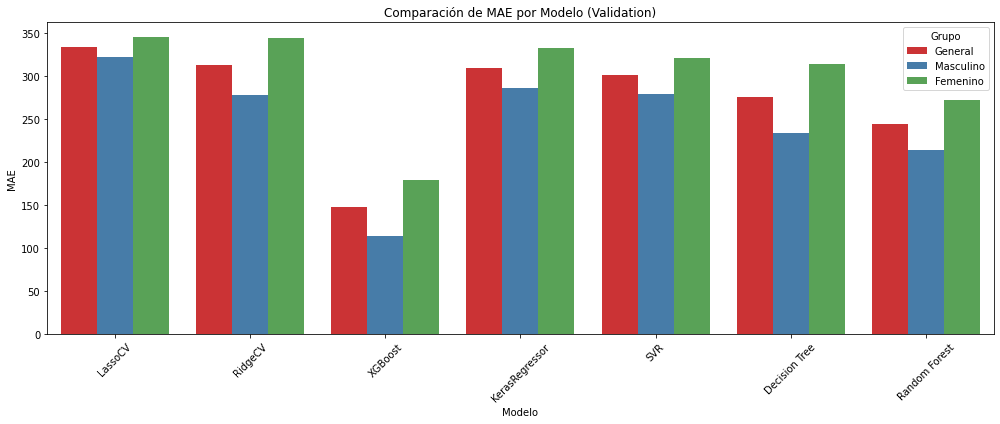

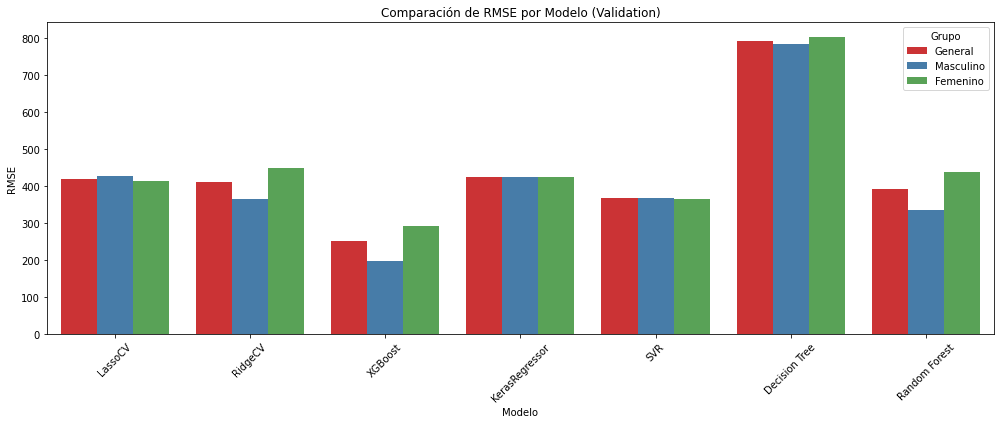

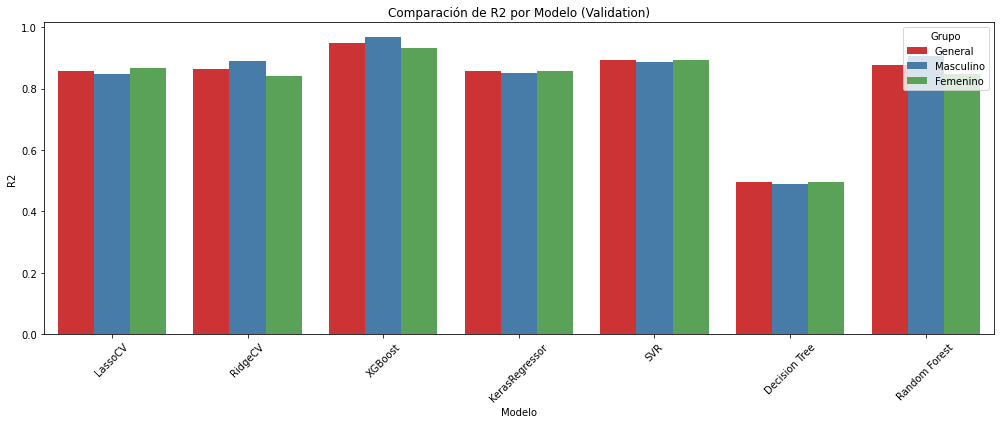

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que estos DataFrames estén cargados
# df_generales = ...
# df_genero_texto = ...

# Separar y copiar los subconjuntos
df_masculino = df_genero_texto[df_genero_texto['Modelo'].str.contains('Masculino')].copy()
df_femenino = df_genero_texto[df_genero_texto['Modelo'].str.contains('Femenino')].copy()
df_generales = df_generales.copy()  # Por si acaso

# Asignar el grupo correctamente
df_generales['Grupo'] = 'General'
df_masculino['Grupo'] = 'Masculino'
df_femenino['Grupo'] = 'Femenino'

# Extraer nombre base del modelo
modelo_regex = r'(LassoCV|RidgeCV|XGBoost|KerasRegressor|SVR|Decision Tree|Random Forest)'

df_generales['Modelo_Base'] = df_generales['Modelo'].str.extract(modelo_regex)
df_masculino['Modelo_Base'] = df_masculino['Modelo'].str.extract(modelo_regex)
df_femenino['Modelo_Base'] = df_femenino['Modelo'].str.extract(modelo_regex)

# Unir todo
df_total = pd.concat([df_generales, df_masculino, df_femenino], ignore_index=True)

# Colores para cada grupo
colores = {'General': 'steelblue', 'Masculino': 'forestgreen', 'Femenino': 'darkorange'}

# Métricas a graficar
metricas = ['mae', 'rmse', 'r2']

# Gráficas por métrica (Test)
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data = df_total[
    (df_total['Tipo'] == 'Validation') |
    (df_total['Tipo'] == 'Ridge Validation') |
    (df_total['Tipo'] == 'Lasso Validation')
],
        x='Modelo_Base',
        y=metrica,
        hue='Grupo',
        palette="Set1"
    )
    plt.title(f'Comparación de {metrica.upper()} por Modelo (Validation)')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Grupo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
df_total

,Modelo,Tipo,mae,mse,rmse,r2,Grupo,Modelo_Base
0,LassoCV Train,Train,334.387427,2.135413e+05,462.105274,0.856964,General,LassoCV
1,LassoCV Test,Test,340.000204,1.728774e+05,415.785244,0.862756,General,LassoCV
2,LassoCV Validation,Validation,333.857851,1.766615e+05,420.311234,0.858752,General,LassoCV
3,RidgeCV Train,Train,285.398635,1.490275e+05,386.040782,0.900177,General,RidgeCV
4,RidgeCV Test,Test,317.053467,1.820448e+05,426.667031,0.855478,General,RidgeCV
5,RidgeCV Validation,Validation,312.135750,1.686448e+05,410.663875,0.865161,General,RidgeCV
6,XGBoost Train,Train,16.492343,6.601162e+02,25.692726,0.999558,General,XGBoost
7,XGBoost Test,Test,172.076646,1.368924e+05,369.989725,0.891324,General,XGBoost
8,XGBoost Validation,Validation,147.416311,6.304967e+04,251.096937,0.949589,General,XGBoost
9,KerasRegressor Train,Train,233.452787,1.593073e+05,399.133185,0.893291,General,KerasRegressor


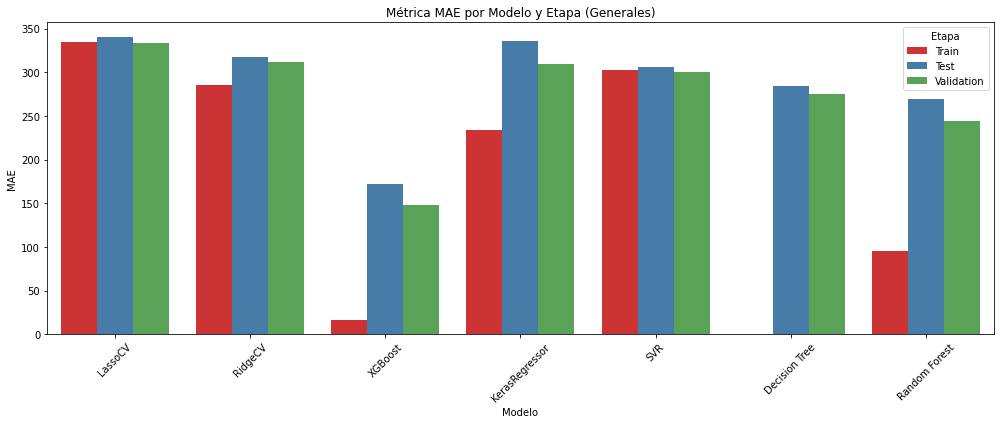

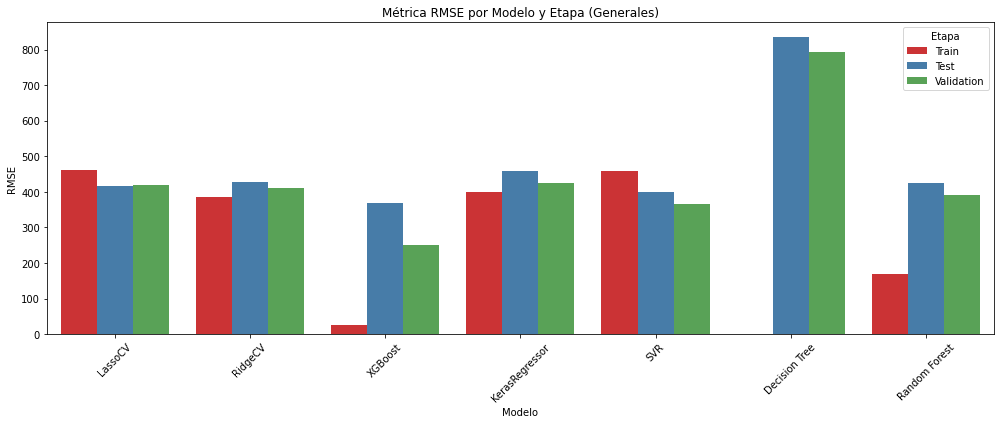

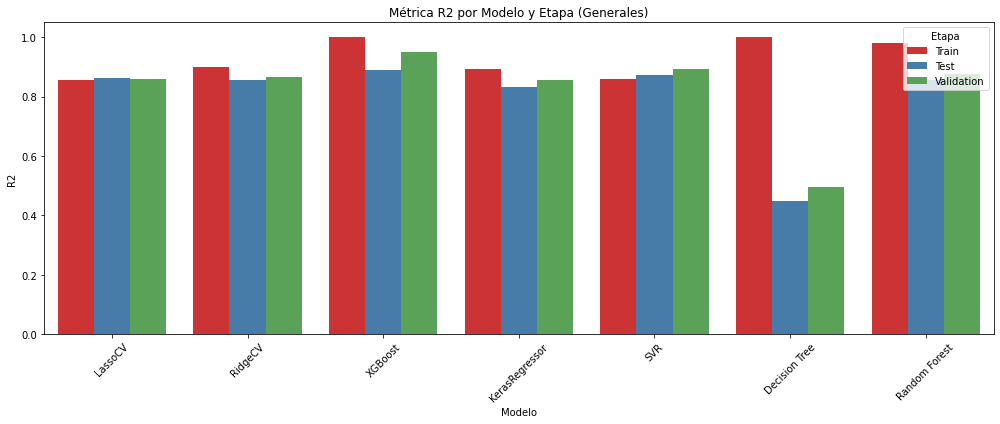

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo datos generales por etapa
df_generales_etapas = df_total[
    (df_total['Grupo'] == 'General') &
    (df_total['Tipo'].isin(['Train', 'Test', 'Validation']))
]

# Métricas a graficar
metricas = ['mae', 'rmse', 'r2']

# Gráficas por métrica
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_generales_etapas,
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'Métrica {metrica.upper()} por Modelo y Etapa (Generales)')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


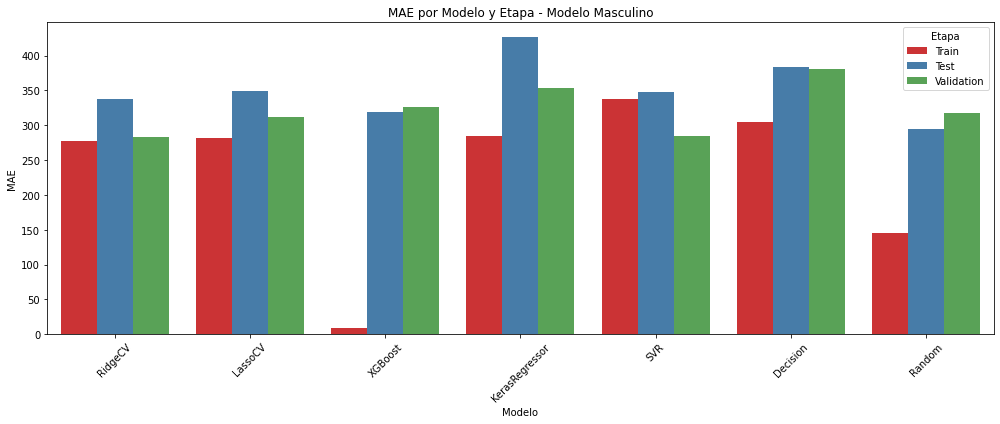

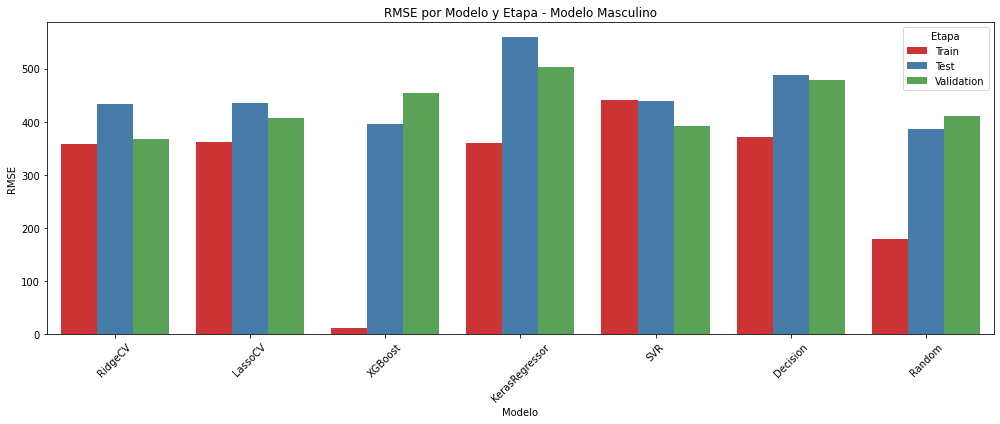

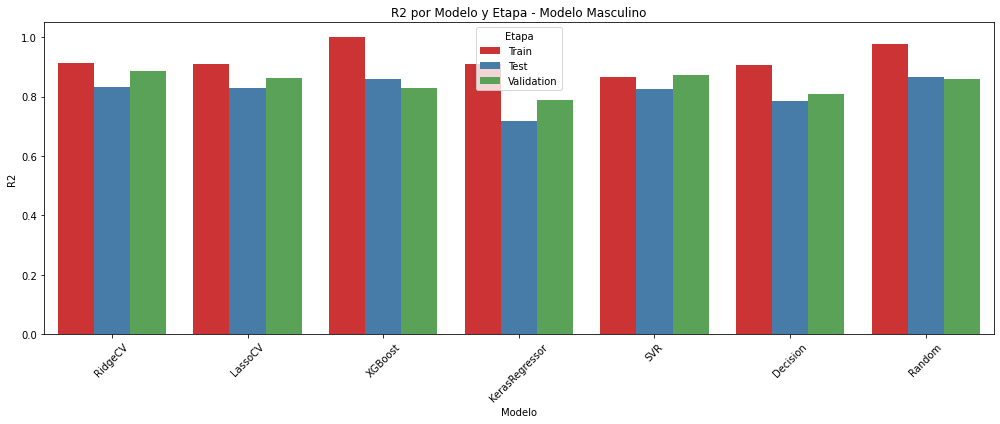

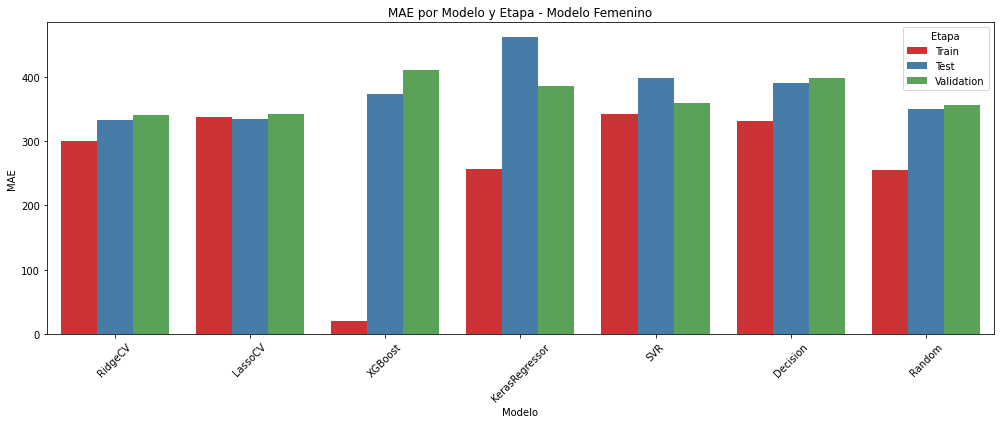

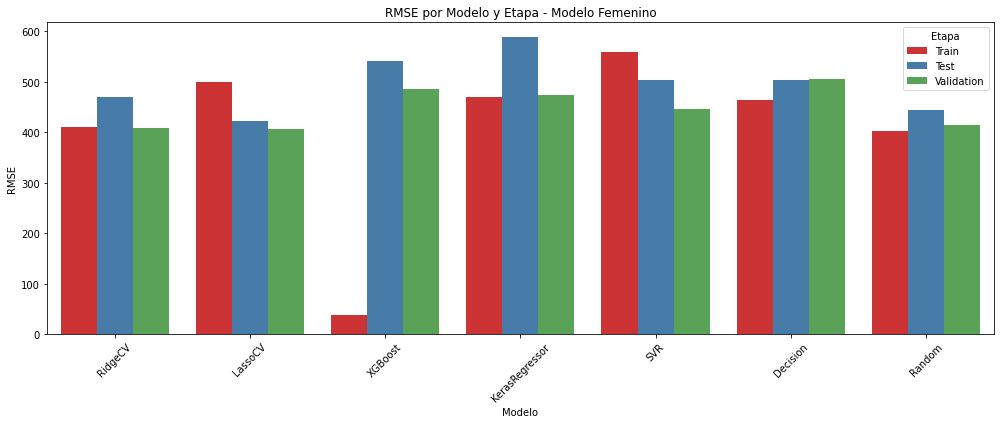

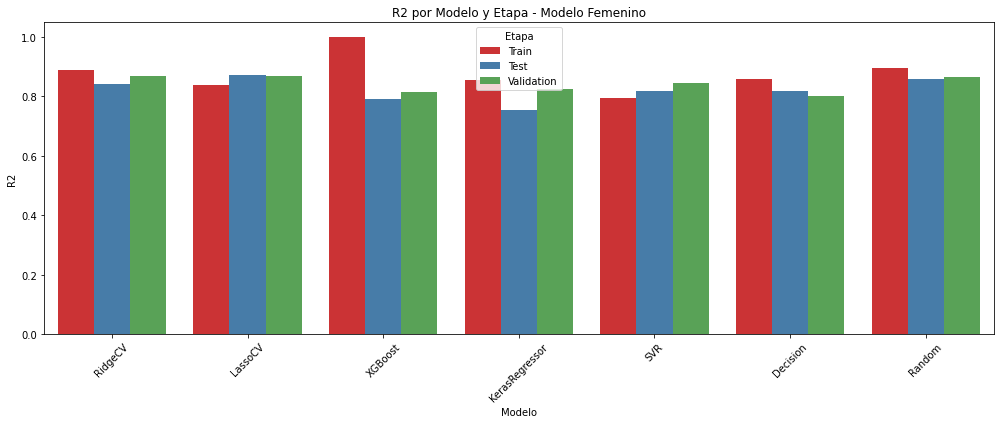

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los modelos por género
df_m = df_genero_guionbajo[df_genero_guionbajo['Modelo'].str.contains('_m', case=False)].copy()
df_f = df_genero_guionbajo[df_genero_guionbajo['Modelo'].str.contains('_f', case=False)].copy()

# Extraer nombre base del modelo
df_m['Modelo_Base'] = df_m['Modelo'].str.extract(r'^([A-Za-z]+)')
df_f['Modelo_Base'] = df_f['Modelo'].str.extract(r'^([A-Za-z]+)')

# Definir métricas
metricas = ['mae', 'rmse', 'r2']

# --------- GRÁFICAS PARA MODELOS MASCULINOS (_m) ---------
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_m[df_m['Tipo'].isin(['Train','Test', 'Validation'])],
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'{metrica.upper()} por Modelo y Etapa - Modelo Masculino')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --------- GRÁFICAS PARA MODELOS FEMENINOS (_f) ---------
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_f[df_f['Tipo'].isin(['Train','Test', 'Validation'])],
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'{metrica.upper()} por Modelo y Etapa - Modelo Femenino')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
from collections import defaultdict

# Función para clasificar por rango de edad
def dias_a_rango(dias):
    años = dias // 365
    if años <= 2:
        return "0-2"
   # if años <= 4:
    #    return "3-4"
    #if años <= 6:
     #   return "5-6"
    if años <= 8:
        return "3-8"
    #elif años <= 10:
     #   return "9-10"
    #if años <= 12:
     #   return "11-12"

    elif años <= 14:
        return "9-14"
    ##if años <= 16:
        return "15-16"
    elif años <= 18:
        return "15-18"
    else:
        return "19+"

# Función para separar por rango
def separar_por_rango(x, y):
    subconjuntos = defaultdict(lambda: {"x": [], "y": []})
    
    for xi, yi in zip(x, y):
        #print(f"Edad: {yi} días, Rango: {dias_a_rango(yi)}")
        rango = dias_a_rango(yi)
        subconjuntos[rango]["x"].append(xi)
        subconjuntos[rango]["y"].append(yi)
    
    return subconjuntos

subconjuntos = separar_por_rango(x_train, y_train)

for rango, datos in subconjuntos.items():
    print(f"Rango {rango} - Cantidad: {len(datos['y'])}")
    y_validation_pred=lasso_cv_f.predict(datos['x'])
    calcular_metricas(y_validation_pred,datos['y'], conjunto='AGE', model='Lasso_cv age')

Rango 3-8 - Cantidad: 48
--- Métricas para AGE ---
MAE:  310.4012
MSE:  175984.3102
RMSE: 419.5048
R²:   0.5106

Rango 9-14 - Cantidad: 91
--- Métricas para AGE ---
MAE:  277.8547
MSE:  129559.9108
RMSE: 359.9443
R²:   0.6699

Rango 15-18 - Cantidad: 17
--- Métricas para AGE ---
MAE:  545.7133
MSE:  364390.6309
RMSE: 603.6478
R²:   -2.3468

Rango 19+ - Cantidad: 1
--- Métricas para AGE ---
MAE:  3567.0843
MSE:  12724090.2529
RMSE: 3567.0843
R²:   nan



c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
y_validation_pred=mlp_g.predict(x_train)
calcular_metricas(y_train, y_validation_pred, conjunto='AGE', model='Lasso_cv age')

--- Métricas para AGE ---
MAE:  412.0887
MSE:  327823.6746
RMSE: 572.5589
R²:   0.7857



In [ ]:
print(selected_features_g)

                                  Feature  Coefficient
1                  Edad Cronológica(días)   814.230102
10              original_shape_Sphericity  -240.326236
63  original_glrlm_RunLengthNonUniformity    16.190897


In [ ]:
print(len(selected_features_g))

3


In [ ]:
print(selected_features_m)

                                              Feature   Coefficient
1                              Edad Cronológica(días)  7.967166e+02
10                          original_shape_Sphericity -4.812362e+02
6               original_shape_Maximum2DDiameterSlice -1.221623e+02
3                      original_shape_MajorAxisLength -6.947621e+01
37                             original_glcm_Contrast -6.731904e+01
19                       original_firstorder_Kurtosis  5.283192e+01
49                                  original_glcm_Idn -5.092318e+01
45                                 original_glcm_Imc2  4.943812e+01
78               original_glszm_SizeZoneNonUniformity  4.546302e+01
14                   original_firstorder_10Percentile -4.111772e+01
11                         original_shape_SurfaceArea  3.962230e+01
82       original_glszm_SmallAreaLowGrayLevelEmphasis -1.982594e+01
0                                        Género(0; 1)  1.755610e+01
2                           original_shape_Elong

In [ ]:
print(len(selected_features_m))

17


In [ ]:
print(selected_features_f)

                                  Feature  Coefficient
1                  Edad Cronológica(días)   831.414937
10              original_shape_Sphericity  -197.870426
63  original_glrlm_RunLengthNonUniformity    46.889410
0                            Género(0; 1)    15.220353


In [ ]:
print(len(selected_features_f))

4
